# 评价分类算法的指标问题

当数据处于极度倾斜（即事件失败发生的概率极低）条件下，分类准确度对于分类而言并不是一个合理的指标

## 混淆矩阵（Confusion Matrix）

对于二分类问题（$2\times 2$）：
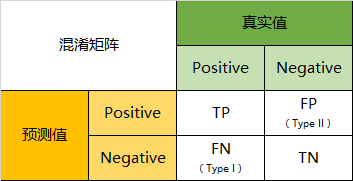

$$精准率=\frac{TP}{TP+FP}$$-预测为正例里面预测正确的概率
$$召回率=\frac{TP}{TP+FN}$$-在真实值的正例里预测正确的概率

sklearn 封装了[confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)    

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [30]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [32]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

E:\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_log_predict = log_reg.predict(X_test)
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_log_predict)

array([[403,   2],
       [  9,  36]], dtype=int64)

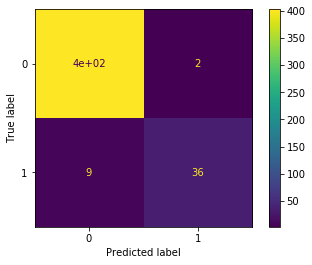

In [36]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_reg,X_test,y_test)

## PR 曲线

reacall 越大，precision 越小；  
当决策边界移动时，recall和precision随之变化；  
将其中的precision和recall分别做x，y轴，可绘制$PR$曲线

精确率[precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)

召回率[recall_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)

f1值[f1_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)

$$f_1=\frac{2\cdot 精准率\cdot 召回率}{精准率+ 召回率}$$

In [6]:
decision_scores = log_reg.decision_function(X_test)#决策矩阵sigmod函数的系数矩阵，sklearn默认的决策边界为0

In [7]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)


In [8]:
precisions.shape

(151,)

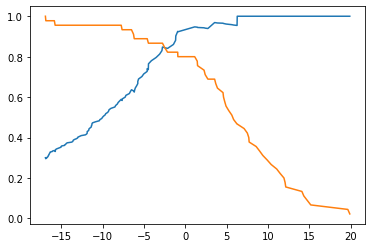

In [9]:
plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])
plt.show()

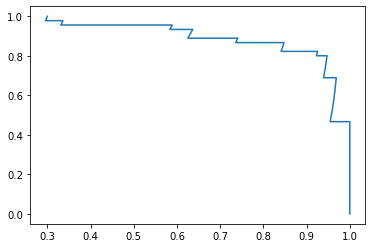

In [10]:
plt.plot(precisions,recalls)
plt.show()

## ROC 曲线

$$TPR=\frac{TP}{TP+FN}$$
$$TPR=\frac{FP}{FP+TN}$$

$TPR$ 和 $FPR$ 是同方向变化的，以 $TPR$ 为x轴，$FPR$ 为y轴，可得到 $ROC$ 曲线

[roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve)

In [11]:
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y_test, decision_scores)

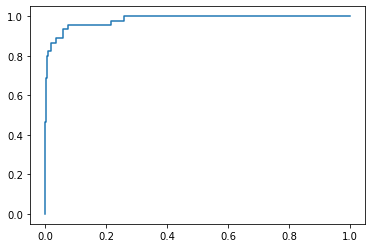

In [12]:
plt.plot(fprs, tprs)
plt.show()

## AUC（ROC曲线的面积）

In [13]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, decision_scores)

0.9823868312757201

# 多分类

In [21]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=666)
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)


E:\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9408901251738526

In [20]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
y_predict = log_reg.predict(X_test)

In [24]:
np.unique(y_predict )

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [25]:
from sklearn.metrics import precision_score
precision_score(y_test,y_predict,average='micro')

0.9408901251738526

In [26]:
precision_score(y_test,y_predict, average="micro")

0.9408901251738526

In [27]:
confusion_matrix(y_test, y_predict)

array([[148,   0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0, 125,   2,   0,   0,   0,   0,   3,   2,  11],
       [  0,   1, 134,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   1, 138,   0,   5,   0,   1,   4,   0],
       [  2,   4,   0,   0, 138,   0,   1,   3,   0,   2],
       [  1,   2,   1,   0,   0, 146,   1,   0,   0,   1],
       [  0,   2,   0,   0,   0,   1, 132,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 135,   0,   1],
       [  0,   8,   2,   1,   3,   3,   0,   1, 120,   2],
       [  0,   1,   0,   6,   0,   1,   0,   1,   1, 137]], dtype=int64)

In [28]:
from sklearn.metrics import recall_score

precision_score(y_test,y_predict, average="micro")

0.9408901251738526